# 10 minutes to pandas

This is a short introduction to pandas, geared mainly for new users.
You can see more complex recipes in the [Cookbook](https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook).

Customarily, we import as follows:

In [ ]:
import numpy as np
import pandas as pd

## Basic data structures in pandas

pandas provides two types of classes for handling data:

1. `Series`: a one-dimensional labeled array holding data of any type
  such as integers, strings, Python objects etc.  
  
2. `DataFrame`: a two-dimensional data structure that holds data like
  a two-dimension array or a table with rows and columns.  

## Object creation

See the [Intro to data structures section](https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro).

Creating a `Series` by passing a list of values, letting pandas create
a default `RangeIndex`.

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [ ]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a `DataFrame` by passing a NumPy array with a datetime index using
`date_range()`
and labeled columns:

---



In [ ]:
dates = pd.date_range("20130101", periods=6)

In [ ]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

In [ ]:
df

,A,B,C,D
2013-01-01,-1.549234,0.270358,1.235651,-0.607237
2013-01-02,-0.871241,-1.770358,0.104336,-1.238324
2013-01-03,-2.178358,1.731122,-0.401844,-0.681558
2013-01-04,-1.257891,0.675036,-1.233745,1.597821
2013-01-05,0.613459,0.599811,0.134976,0.740835
2013-01-06,0.746295,1.408047,1.035575,0.662210


Creating a `DataFrame` by passing a dictionary of objects where the keys are the column
labels and the values are the column values.

In [ ]:
df2 = pd.DataFrame(
     {
         "A": 1.0,
         "B": pd.Timestamp("20130102"),
         "C": pd.Series(1, index=list(range(4)), dtype="float32"),
         "D": np.array([3] * 4, dtype="int32"),
         "E": pd.Categorical(["test", "train", "test", "train"]),
         "F": "foo",
     } )

In [ ]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting `DataFrame` have different
[dtypes](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes):

In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public
attributes) is automatically enabled. Here’s a subset of the attributes that
will be completed:

```ipython
In [12]: df2.<TAB>  # noqa: E225, E999
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.columns
df2.align              df2.copy
df2.all                df2.count
df2.any                df2.combine
df2.append             df2.D
df2.apply              df2.describe
df2.B                  df2.duplicated
df2.diff
```


As you can see, the columns `A`, `B`, `C`, and `D` are automatically
tab completed. `E` and `F` are there as well; the rest of the attributes have been
truncated for brevity.

## Viewing data

See the [Essentially basics functionality section](https://pandas.pydata.org/docs/user_guide/basics.html#basics).

Use `DataFrame.head()` and `DataFrame.tail()` to view the top and bottom rows of the frame
respectively:

In [ ]:
df.head()

,A,B,C,D
2013-01-01,-1.549234,0.270358,1.235651,-0.607237
2013-01-02,-0.871241,-1.770358,0.104336,-1.238324
2013-01-03,-2.178358,1.731122,-0.401844,-0.681558
2013-01-04,-1.257891,0.675036,-1.233745,1.597821
2013-01-05,0.613459,0.599811,0.134976,0.740835


In [ ]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.257891,0.675036,-1.233745,1.597821
2013-01-05,0.613459,0.599811,0.134976,0.740835
2013-01-06,0.746295,1.408047,1.035575,0.662210


Display the `DataFrame.index` or `DataFrame.columns`:

In [ ]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

Return a NumPy representation of the underlying data with `DataFrame.to_numpy()`
without the index or column labels:

In [ ]:
df.to_numpy()

array([[-1.54923412,  0.27035779,  1.23565146, -0.60723684],
       [-0.87124059, -1.77035783,  0.10433597, -1.23832445],
       [-2.17835824,  1.73112209, -0.40184389, -0.68155801],
       [-1.25789107,  0.67503588, -1.23374496,  1.59782141],
       [ 0.61345927,  0.59981053,  0.13497595,  0.74083496],
       [ 0.74629531,  1.40804693,  1.0355753 ,  0.6622103 ]])

>**Note**
>
>**NumPy arrays have one dtype for the entire array while pandas DataFrames
have one dtype per column**. When you call `DataFrame.to_numpy()`, pandas will
find the NumPy dtype that can hold *all* of the dtypes in the DataFrame.
If the common data type is `object`, `DataFrame.to_numpy()` will require
copying data.

In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [ ]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

`describe()` shows a quick statistic summary of your data:

In [ ]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.749495,0.485669,0.145825,0.078958
std,1.187397,1.231815,0.914808,1.083484
min,-2.178358,-1.770358,-1.233745,-1.238324
25%,-1.476398,0.352721,-0.275299,-0.662978
50%,-1.064566,0.637423,0.119656,0.027487
75%,0.242284,1.224794,0.810425,0.721179
max,0.746295,1.731122,1.235651,1.597821


Transposing your data:

In [ ]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.549234,-0.871241,-2.178358,-1.257891,0.613459,0.746295
B,0.270358,-1.770358,1.731122,0.675036,0.599811,1.408047
C,1.235651,0.104336,-0.401844,-1.233745,0.134976,1.035575
D,-0.607237,-1.238324,-0.681558,1.597821,0.740835,0.662210


`DataFrame.sort_index()` sorts by an axis:

In [ ]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.607237,1.235651,0.270358,-1.549234
2013-01-02,-1.238324,0.104336,-1.770358,-0.871241
2013-01-03,-0.681558,-0.401844,1.731122,-2.178358
2013-01-04,1.597821,-1.233745,0.675036,-1.257891
2013-01-05,0.740835,0.134976,0.599811,0.613459
2013-01-06,0.662210,1.035575,1.408047,0.746295


`DataFrame.sort_values()` sorts by values:

In [ ]:
df.sort_values(by="B")

,A,B,C,D
2013-01-02,-0.871241,-1.770358,0.104336,-1.238324
2013-01-01,-1.549234,0.270358,1.235651,-0.607237
2013-01-05,0.613459,0.599811,0.134976,0.740835
2013-01-04,-1.257891,0.675036,-1.233745,1.597821
2013-01-06,0.746295,1.408047,1.035575,0.662210
2013-01-03,-2.178358,1.731122,-0.401844,-0.681558


## Selection

>**Note**
>
>While standard Python / NumPy expressions for selecting and setting are
intuitive and come in handy for interactive work, for production code, we
recommend the optimized pandas data access methods, `DataFrame.at()`, `DataFrame.iat()`,
`DataFrame.loc()` and `DataFrame.iloc()`.

See the indexing documentation [Indexing and Selecting Data](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing) and [MultiIndex / Advanced Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced).

### Getitem (`[]`)

For a `DataFrame`, passing a single label selects a columns and
yields a `Series` equivalent to `df.A`:

In [ ]:
df["A"]

2013-01-01   -1.549234
2013-01-02   -0.871241
2013-01-03   -2.178358
2013-01-04   -1.257891
2013-01-05    0.613459
2013-01-06    0.746295
Freq: D, Name: A, dtype: float64

For a `DataFrame`, passing a slice `:` selects matching rows:

In [ ]:
df[0:3]

,A,B,C,D
2013-01-01,-1.549234,0.270358,1.235651,-0.607237
2013-01-02,-0.871241,-1.770358,0.104336,-1.238324
2013-01-03,-2.178358,1.731122,-0.401844,-0.681558


In [ ]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.871241,-1.770358,0.104336,-1.238324
2013-01-03,-2.178358,1.731122,-0.401844,-0.681558
2013-01-04,-1.257891,0.675036,-1.233745,1.597821


### Selection by label

See more in [Selection by Label](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-label) using `DataFrame.loc()` or `DataFrame.at()`.

Selecting a row matching a label:

In [ ]:
df.loc[dates[0]]

A   -1.549234
B    0.270358
C    1.235651
D   -0.607237
Name: 2013-01-01 00:00:00, dtype: float64

Selecting all rows (`:`) with a select column labels:

In [ ]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-1.549234,0.270358
2013-01-02,-0.871241,-1.770358
2013-01-03,-2.178358,1.731122
2013-01-04,-1.257891,0.675036
2013-01-05,0.613459,0.599811
2013-01-06,0.746295,1.408047


For label slicing, both endpoints are *included*:

In [ ]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.871241,-1.770358
2013-01-03,-2.178358,1.731122
2013-01-04,-1.257891,0.675036


Selecting a single row and column label returns a scalar:

In [ ]:
df.loc[dates[0], "A"]

-1.5492341206972164

For getting fast access to a scalar (equivalent to the prior method):

In [ ]:
df.at[dates[0], "A"]

-1.5492341206972164

### Selection by position

See more in [Selection by Position](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-integer) using `DataFrame.iloc()` or `DataFrame.iat()`.

Select via the position of the passed integers:

In [ ]:
df.iloc[3]

A   -1.257891
B    0.675036
C   -1.233745
D    1.597821
Name: 2013-01-04 00:00:00, dtype: float64

Integer slices acts similar to NumPy/Python:

In [ ]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-1.257891,0.675036
2013-01-05,0.613459,0.599811


Lists of integer position locations:

In [ ]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.871241,0.104336
2013-01-03,-2.178358,-0.401844
2013-01-05,0.613459,0.134976


For slicing rows explicitly:

In [ ]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.871241,-1.770358,0.104336,-1.238324
2013-01-03,-2.178358,1.731122,-0.401844,-0.681558


For slicing columns explicitly:

In [ ]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.270358,1.235651
2013-01-02,-1.770358,0.104336
2013-01-03,1.731122,-0.401844
2013-01-04,0.675036,-1.233745
2013-01-05,0.599811,0.134976
2013-01-06,1.408047,1.035575


For getting a value explicitly:

In [ ]:
df.iloc[1, 1]

-1.770357832048583

For getting fast access to a scalar (equivalent to the prior method):

In [ ]:
df.iat[1, 1]

-1.770357832048583

### Boolean indexing

Select rows where `df.A` is greater than `0`.

In [ ]:
df[df["A"] > 0]

,A,B,C,D
2013-01-05,0.613459,0.599811,0.134976,0.740835
2013-01-06,0.746295,1.408047,1.035575,0.662210


Selecting values from a `DataFrame` where a boolean condition is met:

In [ ]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.270358,1.235651,NaN
2013-01-02,NaN,NaN,0.104336,NaN
2013-01-03,NaN,1.731122,NaN,NaN
2013-01-04,NaN,0.675036,NaN,1.597821
2013-01-05,0.613459,0.599811,0.134976,0.740835
2013-01-06,0.746295,1.408047,1.035575,0.662210


Using `isin()` method for filtering:

In [ ]:
df2 = df.copy()

In [ ]:
df2["E"] = ["one", "one", "two", "three", "four", "three"]

In [ ]:
df2

,A,B,C,D,E
2013-01-01,-1.549234,0.270358,1.235651,-0.607237,one
2013-01-02,-0.871241,-1.770358,0.104336,-1.238324,one
2013-01-03,-2.178358,1.731122,-0.401844,-0.681558,two
2013-01-04,-1.257891,0.675036,-1.233745,1.597821,three
2013-01-05,0.613459,0.599811,0.134976,0.740835,four
2013-01-06,0.746295,1.408047,1.035575,0.662210,three


In [ ]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-2.178358,1.731122,-0.401844,-0.681558,two
2013-01-05,0.613459,0.599811,0.134976,0.740835,four


### Setting

Setting a new column automatically aligns the data by the indexes:

In [ ]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))

In [ ]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [ ]:
df["F"] = s1

Setting values by label:

In [ ]:
df.at[dates[0], "A"] = 0

Setting values by position:

In [ ]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [ ]:
df.loc[:, "D"] = np.array([5] * len(df))

The result of the prior setting operations:

In [ ]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.235651,5.0,NaN
2013-01-02,-0.871241,-1.770358,0.104336,5.0,1.0
2013-01-03,-2.178358,1.731122,-0.401844,5.0,2.0
2013-01-04,-1.257891,0.675036,-1.233745,5.0,3.0
2013-01-05,0.613459,0.599811,0.134976,5.0,4.0
2013-01-06,0.746295,1.408047,1.035575,5.0,5.0


A `where` operation with setting:

In [ ]:
df2 = df.copy()

In [ ]:
df2[df2 > 0] = -df2

In [ ]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.235651,-5.0,NaN
2013-01-02,-0.871241,-1.770358,-0.104336,-5.0,-1.0
2013-01-03,-2.178358,-1.731122,-0.401844,-5.0,-2.0
2013-01-04,-1.257891,-0.675036,-1.233745,-5.0,-3.0
2013-01-05,-0.613459,-0.599811,-0.134976,-5.0,-4.0
2013-01-06,-0.746295,-1.408047,-1.035575,-5.0,-5.0


## Missing data

For NumPy data types, `np.nan` represents missing data. It is by
default not included in computations. See the [Missing Data section](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data).

Reindexing allows you to change/add/delete the index on a specified axis. This
returns a copy of the data:

In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

In [ ]:
df1.loc[dates[0] : dates[1], "E"] = 1

In [ ]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.235651,5.0,NaN,1.0
2013-01-02,-0.871241,-1.770358,0.104336,5.0,1.0,1.0
2013-01-03,-2.178358,1.731122,-0.401844,5.0,2.0,NaN
2013-01-04,-1.257891,0.675036,-1.233745,5.0,3.0,NaN


`DataFrame.dropna()` drops any rows that have missing data:

In [ ]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-0.871241,-1.770358,0.104336,5.0,1.0,1.0


`DataFrame.fillna()` fills missing data:

In [ ]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.235651,5.0,5.0,1.0
2013-01-02,-0.871241,-1.770358,0.104336,5.0,1.0,1.0
2013-01-03,-2.178358,1.731122,-0.401844,5.0,2.0,5.0
2013-01-04,-1.257891,0.675036,-1.233745,5.0,3.0,5.0


`isna()` gets the boolean mask where values are `nan`:

In [ ]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](https://pandas.pydata.org/docs/user_guide/basics.html#basics-binop).

### Stats

Operations in general *exclude* missing data.

Calculate the mean value for each column:

In [ ]:
df.mean()

A   -0.491289
B    0.440610
C    0.145825
D    5.000000
F    3.000000
dtype: float64

Calculate the mean value for each row:

In [ ]:
df.mean(axis=1)

2013-01-01    1.558913
2013-01-02    0.692548
2013-01-03    1.230184
2013-01-04    1.236680
2013-01-05    2.069649
2013-01-06    2.637984
Freq: D, dtype: float64

Operating with another `Series` or `DataFrame` with a different index or column
will align the result with the union of the index or column labels. In addition, pandas
automatically broadcasts along the specified dimension and will fill unaligned labels with `np.nan`.

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [ ]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [ ]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-3.178358,0.731122,-1.401844,4.0,1.0
2013-01-04,-4.257891,-2.324964,-4.233745,2.0,0.0
2013-01-05,-4.386541,-4.400189,-4.865024,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### User defined functions

`DataFrame.agg()` and `DataFrame.transform()` applies a user defined function
that reduces or broadcasts its result respectively.

In [ ]:
df.agg(lambda x: np.mean(x) * 5.6)

A    -2.751220
B     2.467414
C     0.816620
D    28.000000
F    16.800000
dtype: float64

In [ ]:
df.agg(lambda x: np.mean(x) * 5.6)

A    -2.751220
B     2.467414
C     0.816620
D    28.000000
F    16.800000
dtype: float64

In [ ]:
df.transform(lambda x: x * 101.2)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,125.047928,506.0,NaN
2013-01-02,-88.169548,-179.160213,10.558800,506.0,101.2
2013-01-03,-220.449853,175.189556,-40.666602,506.0,202.4
2013-01-04,-127.298576,68.313631,-124.854990,506.0,303.6
2013-01-05,62.082078,60.700826,13.659566,506.0,404.8
2013-01-06,75.525085,142.494349,104.800220,506.0,506.0


### Value Counts

See more at [Histogramming and Discretization](https://pandas.pydata.org/docs/user_guide/basics.html#basics-discretization).

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [ ]:
s

0    1
1    1
2    3
3    1
4    1
5    5
6    4
7    0
8    6
9    6
dtype: int64

In [ ]:
s.value_counts()

1    4
6    2
3    1
5    1
4    1
0    1
Name: count, dtype: int64

### String Methods

`Series` is equipped with a set of string processing methods in the `str`
attribute that make it easy to operate on each element of the array, as in the
code snippet below. See more at [Vectorized String Methods](https://pandas.pydata.org/docs/user_guide/text.html#text-string-methods).

In [ ]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

In [ ]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together `Series` and
`DataFrame` objects with various kinds of set logic for the indexes
and relational algebra functionality in the case of join / merge-type
operations.

See the [Merging section](https://pandas.pydata.org/docs/user_guide/merging.html#merging).

Concatenating pandas objects together row-wise with `concat()`:

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4))

In [ ]:
df

,0,1,2,3
0,-1.803123,-0.374968,-0.265512,-3.114605
1,-0.210343,-1.882879,0.204623,-0.857178
2,0.074794,-1.743887,0.604897,-1.615763
3,0.058021,-0.121051,-0.971650,-0.327127
4,0.109200,-1.483430,-1.638006,-0.550851
5,-1.008783,-0.813102,-0.278605,-0.580466
6,-0.048274,0.024397,1.361988,0.675696
7,-0.099845,0.177242,-1.463516,1.380143
8,-0.215792,0.238879,1.962789,-2.564457
9,0.549212,-0.311956,1.396999,-1.124919


In [ ]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [ ]:
pd.concat(pieces)

,0,1,2,3
0,-1.803123,-0.374968,-0.265512,-3.114605
1,-0.210343,-1.882879,0.204623,-0.857178
2,0.074794,-1.743887,0.604897,-1.615763
3,0.058021,-0.121051,-0.971650,-0.327127
4,0.109200,-1.483430,-1.638006,-0.550851
5,-1.008783,-0.813102,-0.278605,-0.580466
6,-0.048274,0.024397,1.361988,0.675696
7,-0.099845,0.177242,-1.463516,1.380143
8,-0.215792,0.238879,1.962789,-2.564457
9,0.549212,-0.311956,1.396999,-1.124919


>**Note**
>
>Adding a column to a `DataFrame` is relatively fast. However, adding
a row requires a copy, and may be expensive. We recommend passing a
pre-built list of records to the `DataFrame` constructor instead
of building a `DataFrame` by iteratively appending records to it.

### Join

`merge()` enables SQL style join types along specific columns. See the [Database style joining](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join) section.

In [ ]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

In [ ]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [ ]:
left

,key,lval
0,foo,1
1,foo,2


In [ ]:
right

,key,rval
0,foo,4
1,foo,5


In [ ]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


`merge()` on unique keys:

In [ ]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

In [ ]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [ ]:
left

,key,lval
0,foo,1
1,bar,2


In [ ]:
right

,key,rval
0,foo,4
1,bar,5


In [ ]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the
following steps:

- **Splitting** the data into groups based on some criteria  
- **Applying** a function to each group independently  
- **Combining** the results into a data structure  


See the [Grouping section](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby).

In [ ]:
df = pd.DataFrame(
     {
         "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
         "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
         "C": np.random.randn(8),
         "D": np.random.randn(8),
     }
 )

In [ ]:
df

,A,B,C,D
0,foo,one,0.605452,-0.694770
1,bar,one,0.134897,0.671785
2,foo,two,-0.951252,-0.503481
3,bar,three,1.627012,0.470349
4,foo,two,-2.379818,0.790763
5,bar,two,0.842547,-0.188849
6,foo,one,0.992314,1.607165
7,foo,three,1.379685,1.248326


Grouping by a column label, selecting column labels, and then applying the
[`DataFrameGroupBy.sum()`](../reference/api/pandas.core.groupby.DataFrameGroupBy.sum.ipynb#pandas.core.groupby.DataFrameGroupBy.sum) function to the resulting
groups:

In [ ]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,2.604457,0.953285
foo,-0.353619,2.448004


Grouping by multiple columns label forms `MultiIndex`.

In [ ]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.134897  0.671785
    three  1.627012  0.470349
    two    0.842547 -0.188849
foo one    1.597766  0.912395
    three  1.379685  1.248326
    two   -3.331070  0.287283

## Reshaping

See the sections on [Hierarchical Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical) and
[Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking).

### Stack

In [ ]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
 ]

In [ ]:
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

In [ ]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [ ]:
df2 = df[:4]

In [ ]:
df2

A         B
first second                    
bar   one    -0.500023  0.431644
      two    -1.833937  1.212688
baz   one    -0.198144  1.987539
      two    -0.481874 -0.680060

The `stack()` method “compresses” a level in the DataFrame’s
columns:

In [ ]:
stacked = df2.stack()

In [ ]:
stacked

first  second   
bar    one     A   -0.500023
               B    0.431644
       two     A   -1.833937
               B    1.212688
baz    one     A   -0.198144
               B    1.987539
       two     A   -0.481874
               B   -0.680060
dtype: float64

With a “stacked” DataFrame or Series (having a `MultiIndex` as the
`index`), the inverse operation of `stack()` is
`unstack()`, which by default unstacks the **last level**:

In [ ]:
stacked.unstack()

A         B
first second                    
bar   one    -0.500023  0.431644
      two    -1.833937  1.212688
baz   one    -0.198144  1.987539
      two    -0.481874 -0.680060

In [ ]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.500023 -1.833937
      B  0.431644  1.212688
baz   A -0.198144 -0.481874
      B  1.987539 -0.680060

In [ ]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.500023 -0.198144
       B  0.431644  1.987539
two    A -1.833937 -0.481874
       B  1.212688 -0.680060

### Pivot tables

See the section on [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot).

In [ ]:
df = pd.DataFrame(
     {
         "A": ["one", "one", "two", "three"] * 3,
         "B": ["A", "B", "C"] * 4,
         "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
         "D": np.random.randn(12),
         "E": np.random.randn(12),
     }
 )

In [ ]:
df

,A,B,C,D,E
0,one,A,foo,-2.088870,1.242519
1,one,B,foo,0.261633,-1.177092
2,two,C,foo,-1.133779,-2.111315
3,three,A,bar,3.148621,0.806051
4,one,B,bar,-1.027132,-1.257008
5,one,C,bar,0.780227,-0.741734
6,two,A,foo,0.083566,-0.796336
7,three,B,foo,0.093398,0.256192
8,one,C,foo,-1.130527,-0.599339
9,one,A,bar,0.532459,-0.155039


`pivot_table()` pivots a `DataFrame` specifying the `values`, `index` and `columns`

In [ ]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.532459 -2.088870
      B -1.027132  0.261633
      C  0.780227 -1.130527
three A  3.148621       NaN
      B       NaN  0.093398
      C -0.380153       NaN
two   A       NaN  0.083566
      B -0.743942       NaN
      C       NaN -1.133779

## Time series

pandas has simple, powerful, and efficient functionality for performing
resampling operations during frequency conversion (e.g., converting secondly
data into 5-minutely data). This is extremely common in, but not limited to,
financial applications. See the [Time Series section](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries).

In [ ]:
rng = pd.date_range("1/1/2012", periods=100, freq="s")

In [ ]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [ ]:
ts.resample("5Min").sum()

2012-01-01    23919
Freq: 5T, dtype: int64

`Series.tz_localize()` localizes a time series to a time zone:

In [ ]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [ ]:
ts

2012-03-06   -0.144978
2012-03-07    0.344703
2012-03-08   -0.577747
2012-03-09    1.156446
2012-03-10   -0.803409
Freq: D, dtype: float64

In [ ]:
ts_utc = ts.tz_localize("UTC")

In [ ]:
ts_utc

2012-03-06 00:00:00+00:00   -0.144978
2012-03-07 00:00:00+00:00    0.344703
2012-03-08 00:00:00+00:00   -0.577747
2012-03-09 00:00:00+00:00    1.156446
2012-03-10 00:00:00+00:00   -0.803409
Freq: D, dtype: float64

`Series.tz_convert()` converts a timezones aware time series to another time zone:

In [ ]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -0.144978
2012-03-06 19:00:00-05:00    0.344703
2012-03-07 19:00:00-05:00   -0.577747
2012-03-08 19:00:00-05:00    1.156446
2012-03-09 19:00:00-05:00   -0.803409
Freq: D, dtype: float64

Adding a non-fixed duration ([`BusinessDay`](../reference/api/pandas.tseries.offsets.BusinessDay.ipynb#pandas.tseries.offsets.BusinessDay)) to a time series:

In [ ]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)

## Categoricals

pandas can include categorical data in a `DataFrame`. For full docs, see the
[categorical introduction](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/docs/reference/arrays.html#api-arrays-categorical).

In [ ]:
df = pd.DataFrame(
     {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
 )

Converting the raw grades to a categorical data type:

In [ ]:
df["grade"] = df["raw_grade"].astype("category")

In [ ]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names:

In [ ]:
new_categories = ["very good", "good", "very bad"]

In [ ]:
df["grade"] = df["grade"].cat.rename_categories(new_categories)

Reorder the categories and simultaneously add the missing categories (methods under `Series.cat()` return a new `Series` by default):

In [ ]:
df["grade"] = df["grade"].cat.set_categories(
     ["very bad", "bad", "medium", "good", "very good"]
 )

In [ ]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order:

In [ ]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column with `observed=False` also shows empty categories:

In [ ]:
df.groupby("grade", observed=False).size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

See the [Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization) docs.

We use the standard convention for referencing the matplotlib API:

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.close("all")

The `plt.close` method is used to [close](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.close.html) a figure window:

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [ ]:
ts = ts.cumsum()

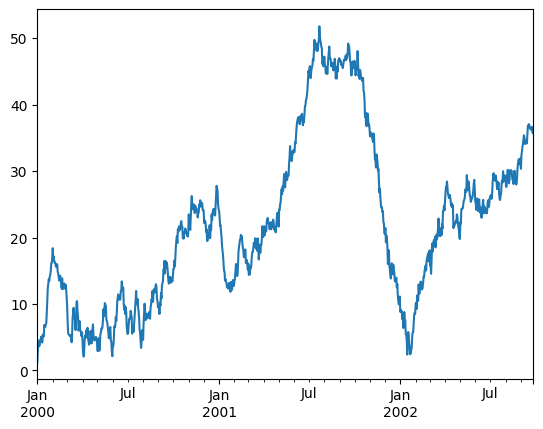

In [ ]:
ts.plot();

>**Note**
>
>When using Jupyter, the plot will appear using `plot()`.  Otherwise use
[matplotlib.pyplot.show](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html) to show it or
[matplotlib.pyplot.savefig](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) to write it to a file.

`plot()` plots all columns:

In [ ]:
df = pd.DataFrame(
     np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
 )

In [ ]:
df = df.cumsum()

In [ ]:
plt.figure();

<Figure size 640x480 with 0 Axes>

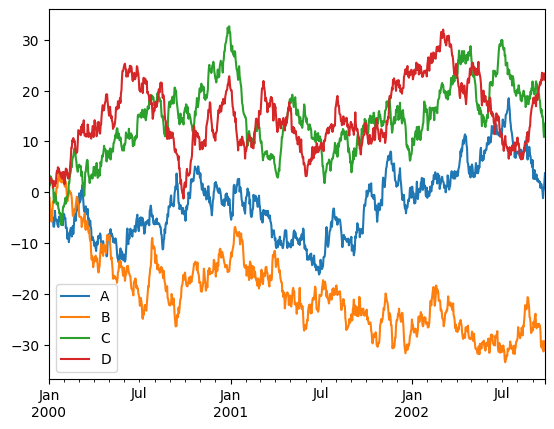

In [ ]:
df.plot();

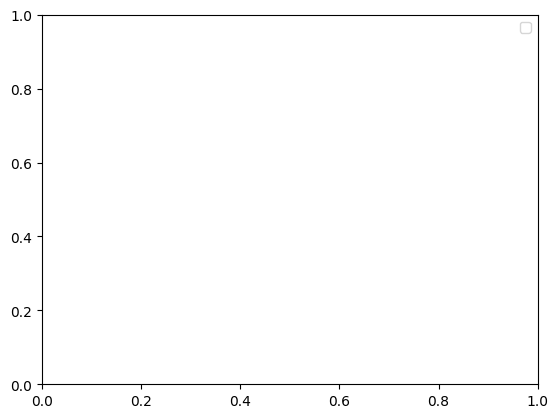

In [ ]:
plt.legend(loc='best');

## Importing and exporting data

See the [IO Tools](https://pandas.pydata.org/docs/user_guide/io.html#io) section.

### CSV

[Writing to a csv file:](https://pandas.pydata.org/docs/user_guide/io.html#io-store-in-csv) using `DataFrame.to_csv()`

In [ ]:
df = pd.DataFrame(np.random.randint(0, 5, (10, 5)))

In [ ]:
df.to_csv("foo.csv")

[Reading from a csv file:](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table) using `read_csv()`

In [ ]:
pd.read_csv("foo.csv")

,Unnamed: 0,0,1,2,3,4
0,0,0,3,1,1,4
1,1,0,1,4,3,0
2,2,2,3,1,0,2
3,3,2,1,1,0,1
4,4,2,3,0,2,3
5,5,3,4,4,4,0
6,6,2,4,3,4,2
7,7,1,0,4,0,1
8,8,4,3,0,0,1
9,9,4,4,2,1,0


### Parquet

Writing to a Parquet file:

In [ ]:
df.to_parquet("foo.parquet")

Reading from a Parquet file Store using `read_parquet()`:

In [ ]:
pd.read_parquet("foo.parquet")

,0,1,2,3,4
0,0,3,1,1,4
1,0,1,4,3,0
2,2,3,1,0,2
3,2,1,1,0,1
4,2,3,0,2,3
5,3,4,4,4,0
6,2,4,3,4,2
7,1,0,4,0,1
8,4,3,0,0,1
9,4,4,2,1,0


### Excel

Reading and writing to [Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel).

Writing to an excel file using `DataFrame.to_excel()`:

In [ ]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file using `read_excel()`:

In [ ]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,0,1,2,3,4
0,0,0,3,1,1,4
1,1,0,1,4,3,0
2,2,2,3,1,0,2
3,3,2,1,1,0,1
4,4,2,3,0,2,3
5,5,3,4,4,4,0
6,6,2,4,3,4,2
7,7,1,0,4,0,1
8,8,4,3,0,0,1
9,9,4,4,2,1,0


## Gotchas

If you are attempting to perform a boolean operation on a `Series` or `DataFrame`
you might see an exception like:

In [ ]:
if pd.Series([False, True, False]):
      print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Comparisons](https://pandas.pydata.org/docs/user_guide/basics.html#basics-compare) and [Gotchas](gotchas.ipynb#gotchas) for an explanation and what to do.